#TALLER FINAL 1ER CORTE - JUAN DIEGO CASTELLANOS JEREZ

###INSTALACIÓN LIBRERIAS

In [121]:
!pip install fsspec
!pip install beautifulsoup4
!pip install wikitables

###IMPORTACIÓN DE LIBRERIAS

In [122]:
# Librerías clásicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 


#Sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA

#Others
from mpl_toolkits.mplot3d import Axes3D
import requests
from bs4 import BeautifulSoup


%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [238]:
def to_float_from_str_decimal(string):
    """ It convert '12.540,5' to 125040.50 """
    try:
        return float(string.replace(',', '.').replace('.', ''))
    except:
        return string

In [239]:
df_accion = pd.read_csv("drive/MyDrive/deep_learning/finance.csv",delimiter=",",skip_blank_lines=True,converters={'volume': to_float_from_str_decimal})
df_accion.head(5)

,date,open,high,low,close,adjClose,volume
0,"Sep 24, 2021",46.40,46.74,46.24,46.51,46.51,1.0735e+06
1,"Sep 23, 2021",45.79,46.57,45.76,46.36,46.36,1.509e+06
2,"Sep 22, 2021",45.21,46.07,44.99,45.63,45.63,1.6682e+06
3,"Sep 21, 2021",45.28,45.77,44.62,44.80,44.80,1.5865e+06
4,"Sep 20, 2021",45.04,45.40,44.49,45.10,45.10,1.8211e+06


###CONOCIENDO DATOS

In [240]:
#df_accion.info()
#df_accion.shape
#df_accion.describe()
df_accion.isnull().sum()

date         0
open        76
high        76
low         76
close       76
adjClose    76
volume       0
dtype: int64

###ELIMINANDO FILAS VACIAS

In [241]:
df_accion = df_accion.dropna()
df_accion = df_accion.reset_index(drop=True)


In [244]:
df_accion['volume']= pd.to_numeric(df_accion['volume'])

###PREPARANDO DATOS

In [245]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df_accion['date'] # Guardamos la columna Date.
df_accion = df_accion.drop('date', 1) # Borramos la columna del dataframe.

In [246]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df_accion)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'close', 1: 'volume'})



In [247]:


df_escalado.head()
df_escalado.isnull().sum()



close     0
volume    0
2         0
3         0
4         0
5         0
dtype: int64

###GRAFICAS

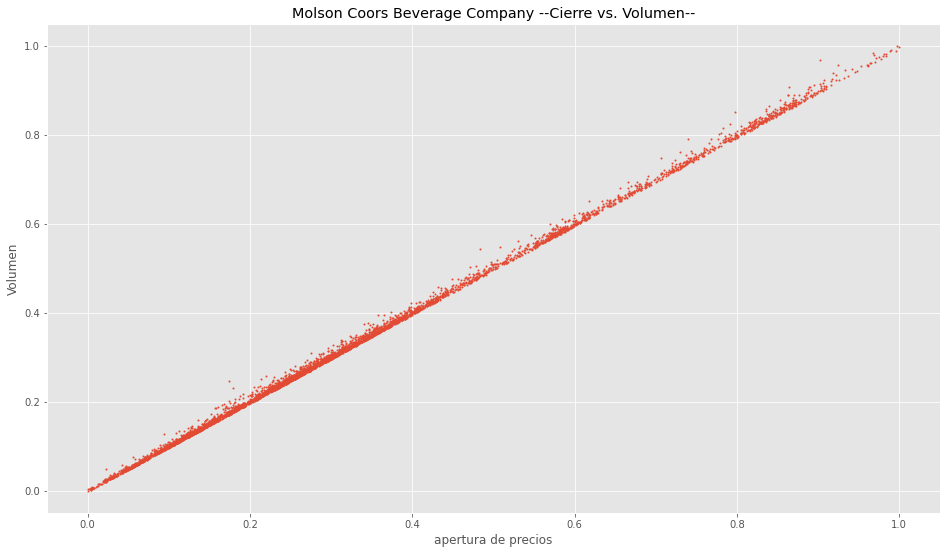

In [253]:
#%% Representación gráfica de los datos.
x = df_escalado['close'].values
y = df_escalado['volume'].values
plt.xlabel('apertura de precios')
plt.ylabel('Volumen')
plt.title('Molson Coors Beverage Company --Cierre vs. Volumen--')
plt.plot(x,y,'o',markersize=1)



###APLICANDO KMEANS

###GRAFICA "DE CODO"

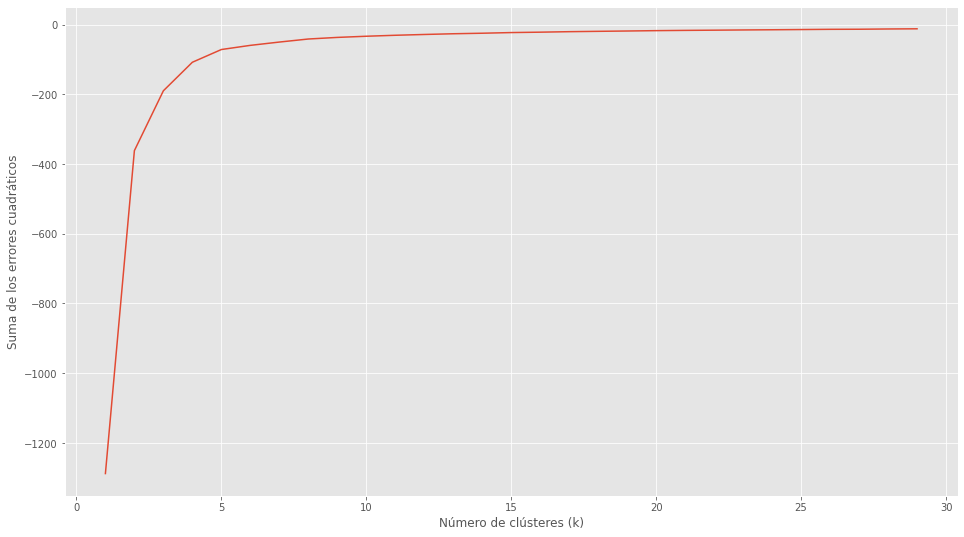

In [254]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)



###APLICACION DEL ALGORITMO KMEAN

In [255]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[0.25042154 0.25173451 0.2502473  0.25092815 0.24464175 0.07122659]
 [0.82065328 0.82249251 0.81697044 0.8228843  0.83333385 0.08519768]
 [0.58451655 0.58632219 0.58176382 0.58570623 0.60496647 0.0816987 ]
 [0.10875251 0.10888234 0.11062536 0.10886667 0.09134354 0.04974695]
 [0.37678694 0.37887482 0.37523655 0.37770955 0.41112188 0.07375449]]


In [258]:
labels = kmeans.predict(df_escalado)   #generamos las etiquetas de cada clouster
df_accion['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original

df_accion.insert(0, 'Date', dates) 

In [261]:
df_accion.head(40)

,Date,open,high,low,close,adjClose,volume,label
0,"Sep 24, 2021",46.40,46.74,46.24,46.51,46.51,1073500.0,0
1,"Sep 23, 2021",45.79,46.57,45.76,46.36,46.36,1509000.0,0
2,"Sep 22, 2021",45.21,46.07,44.99,45.63,45.63,1668200.0,0
3,"Sep 21, 2021",45.28,45.77,44.62,44.80,44.80,1586500.0,0
4,"Sep 20, 2021",45.04,45.40,44.49,45.10,45.10,1821100.0,0
5,"Sep 17, 2021",46.20,46.36,45.42,45.80,45.80,3053100.0,0
6,"Sep 16, 2021",46.47,46.75,46.21,46.38,46.38,1360600.0,0
7,"Sep 15, 2021",46.52,46.73,45.95,46.57,46.57,1391500.0,0
8,"Sep 14, 2021",46.85,46.90,46.17,46.58,46.58,1485800.0,0
9,"Sep 13, 2021",45.98,47.59,45.83,46.94,46.94,1531300.0,0


###GRAFICO DE LOS CLÚSTERES KMEANS

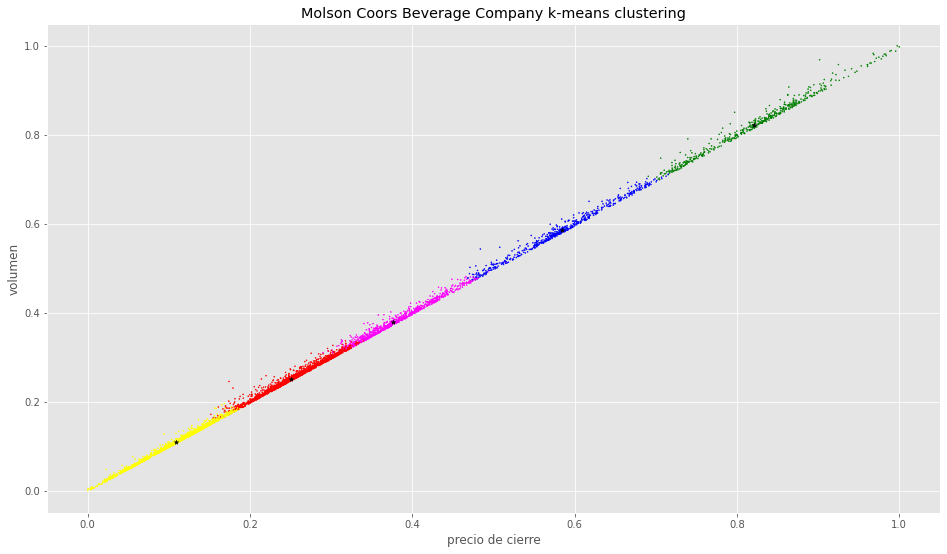

In [262]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('precio de cierre')
plt.ylabel('volumen')
plt.title('Molson Coors Beverage Company k-means clustering')
plt.show()



###CLASIFICACIÓN DE NUEVAS MUESTRAS

In [263]:
close = 100000
volume = 5500000

nuevo_dato = pd.DataFrame([[close,volume]]) # Nueva muestra
nuevo_dato = nuevo_dato.rename(columns = {0: 'close', 1: 'volume'})

In [264]:
df_n = df_accion.append(nuevo_dato)

In [266]:
df_n

,Date,open,high,low,close,adjClose,volume,label
0,"Sep 24, 2021",46.40,46.74,46.24,46.51,46.51,1073500.0,0.0
1,"Sep 23, 2021",45.79,46.57,45.76,46.36,46.36,1509000.0,0.0
2,"Sep 22, 2021",45.21,46.07,44.99,45.63,45.63,1668200.0,0.0
3,"Sep 21, 2021",45.28,45.77,44.62,44.80,44.80,1586500.0,0.0
4,"Sep 20, 2021",45.04,45.40,44.49,45.10,45.10,1821100.0,0.0
...,...,...,...,...,...,...,...,...
5032,"Sep 28, 2001",22.30,22.62,22.30,22.50,15.03,548000.0,3.0
5033,"Sep 27, 2001",22.19,22.53,21.94,22.25,14.86,788400.0,3.0
5034,"Sep 26, 2001",22.35,22.71,22.21,22.32,14.91,461400.0,3.0
5035,"Sep 25, 2001",21.92,22.50,21.83,22.34,14.93,586800.0,3.0


In [267]:
df_n = df_n.drop('Date', 1)
df_n = df_n.drop('label', 1)
df_n = df_n.reset_index(drop=True)

In [268]:
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df_n)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [269]:
df_escalado.iloc[-3:]

,Close,Volume,2,3,4,5
5034,0.005022,0.006440,0.008706,0.000004,0.003146,0.018642
5035,0.000223,0.004108,0.004465,0.000004,0.003380,0.024654
5036,NaN,NaN,NaN,1.000000,NaN,0.260228


In [270]:
close_n = df_escalado['Close'][2784]
volume_n = df_escalado['Volume'][2784]
import numpy as np
X_new = np.array([[close_n, volume_n]]) # Nueva muestra